# Project : Detection of Terrier Dogs Using ResNet on the StanfordDogs Dataset #

Samuel METIN , Maxime APARICIO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading of the Data

In [2]:
!mkdir data data/StanfordDogs
!cd data && wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar && tar -xf images.tar -C StanfordDogs

--2025-06-16 00:58:26--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  22.0MB/s    in 68s     

2025-06-16 00:59:34 (11.1 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [3]:
!cd data && wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar && tar -xf annotation.tar -C StanfordDogs

--2025-06-16 00:59:44--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar’

annotation.tar      100%[===================>]  20.84M  4.38MB/s    in 9.6s    

2025-06-16 00:59:54 (2.17 MB/s) - ‘annotation.tar’ saved [21852160/21852160]



In [5]:
# Create the directory tree
!mkdir data/StanfordDogs_final data/StanfordDogs_final/Images data/StanfordDogs_final/Annotation

mkdir: cannot create directory ‘data/StanfordDogs_final’: File exists
mkdir: cannot create directory ‘data/StanfordDogs_final/Images’: File exists
mkdir: cannot create directory ‘data/StanfordDogs_final/Annotation’: File exists


In [6]:
# We get 10 images for testing with the Staffordshire breed, we rename the files with a "z" to place them in the last positions of the dataset

!ls data/StanfordDogs/Images/n02093428-American_Staffordshire_terrier | head -n 10 | xargs -I{} cp "data/StanfordDogs/Images/n02093428-American_Staffordshire_terrier/{}" "data/StanfordDogs_final/Images/z_{}"
!ls data/StanfordDogs/Annotation/n02093428-American_Staffordshire_terrier | head -n 10 | xargs -I{} cp "data/StanfordDogs/Annotation/n02093428-American_Staffordshire_terrier/{}" "data/StanfordDogs_final/Annotation/z_{}"

In [7]:
# We get all the Terrier breeds files

!cp -r data/StanfordDogs/Images/n02096177-cairn/* data/StanfordDogs_final/Images/
!cp -r data/StanfordDogs/Annotation/n02096177-cairn/* data/StanfordDogs_final/Annotation/

!cp -r data/StanfordDogs/Images/n02096294-Australian_terrier/* data/StanfordDogs_final/Images/
!cp -r data/StanfordDogs/Annotation/n02096294-Australian_terrier/* data/StanfordDogs_final/Annotation/

!cp -r data/StanfordDogs/Images/n02098286-West_Highland_white_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02098286-West_Highland_white_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02094114-Norfolk_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02094114-Norfolk_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02093754-Border_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02093754-Border_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02094258-Norwich_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02094258-Norwich_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02094433-Yorkshire_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02094433-Yorkshire_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02086240-Shih-Tzu/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02086240-Shih-Tzu/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02085782-Japanese_spaniel/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02085782-Japanese_spaniel/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02085936-Maltese_dog/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02085936-Maltese_dog/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02086646-Blenheim_spaniel/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02086646-Blenheim_spaniel/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02093991-Irish_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02093991-Irish_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02095570-Lakeland_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02095570-Lakeland_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02096437-Dandie_Dinmont/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02096437-Dandie_Dinmont/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02097047-miniature_schnauzer/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02097047-miniature_schnauzer/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02097474-Tibetan_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02097474-Tibetan_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02097658-silky_terrier/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02097658-silky_terrier/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02098413-Lhasa/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02098413-Lhasa/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02105641-Old_English_sheepdog/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02105641-Old_English_sheepdog/* data/StanfordDogs_final/Annotation

!cp -r data/StanfordDogs/Images/n02113624-toy_poodle/* data/StanfordDogs_final/Images
!cp -r data/StanfordDogs/Annotation/n02113624-toy_poodle/* data/StanfordDogs_final/Annotation

In [8]:
import os
import io
import cv2
import time
import copy
import torch
import contextlib
import torchvision
import torch.utils.data

import numpy as np
import torchvision.transforms as T

from PIL import Image
# from tqdm import tqdm
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
from matplotlib import pyplot as plt
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as coco_mask
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import Subset
import xml.etree.ElementTree as ET


# Seed.
np.random.seed(66)
torch.manual_seed(66)

# Hyperparameters.
EPOCH = 2
BATCH_SIZE = 2
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### First part : qualitative result of the detection of Terrier dog with RESNET 50 pretrained

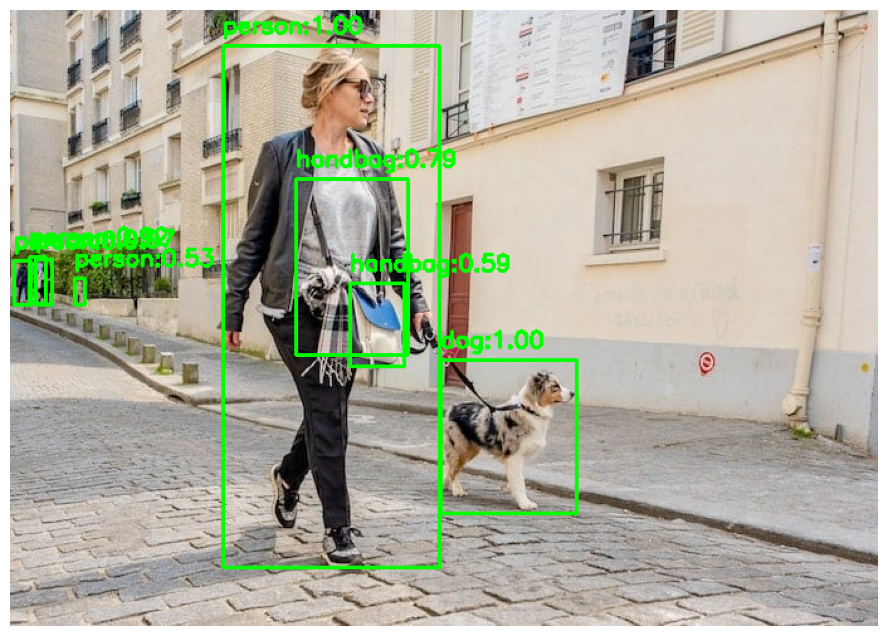

In [10]:
# Load the pretrained model on COCO Faster RCNN RESNET 50 (91 classes)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.to(DEVICE)

# Transformation
transform = T.Compose([T.ToTensor()])

def show_image_with_boxes(image, boxes, labels, scores, threshold=0.5):
    image = np.array(image)
    for box, label, score in zip(boxes, labels, scores):
        if score < threshold:
            continue
        xmin, ymin, xmax, ymax = box.astype(int)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, f"{label}:{score:.2f}", (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Load the image
img_path = "/content/chien-en-ville.jpeg"
img = Image.open(img_path).convert("RGB")
img_t = transform(img).to(DEVICE)

# Prediction
with torch.no_grad():
    pred = model([img_t])[0]

boxes = pred['boxes'].cpu().numpy()
labels = pred['labels'].cpu().numpy()
scores = pred['scores'].cpu().numpy()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush',
    'hair brush'
]

# Print with the name of each present class
labels_names = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in labels]

show_image_with_boxes(img, boxes, labels_names, scores)

### Definition of the Dataset ###

In [11]:
class StanfordDogsDataset(Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms

        self.img = sorted([
            f for f in os.listdir(os.path.join(root, "Images"))
            if f.lower().endswith(".jpg") # jpg extension for these files
        ])

        self.ann = sorted([
            f for f in os.listdir(os.path.join(root, "Annotation"))
            if '.' not in f  # no extension for these files
        ])

    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, "Images", self.img[idx])
        ann_path = os.path.join(self.root, "Annotation", self.ann[idx])

        img = Image.open(img_path).convert("RGB")

        # Parse XML
        tree = ET.parse(ann_path)
        root = tree.getroot()
        boxes = []
        labels = []
        iscrowd = []
        for obj in root.findall("object"):
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(1) # Only one class : terrier
            iscrowd.append(0) # Suppose all instances are not crowd

        num_objs = len(boxes)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        iscrowd = torch.as_tensor(iscrowd, dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id" : image_id,
            "area" : area,
            "iscrowd" : iscrowd
        }

        if self.transforms is not None:
            img = self.transforms(img)
        else:
            img = np.asarray(img)

        return img, target

total : 3699
train : 3679
test : 20


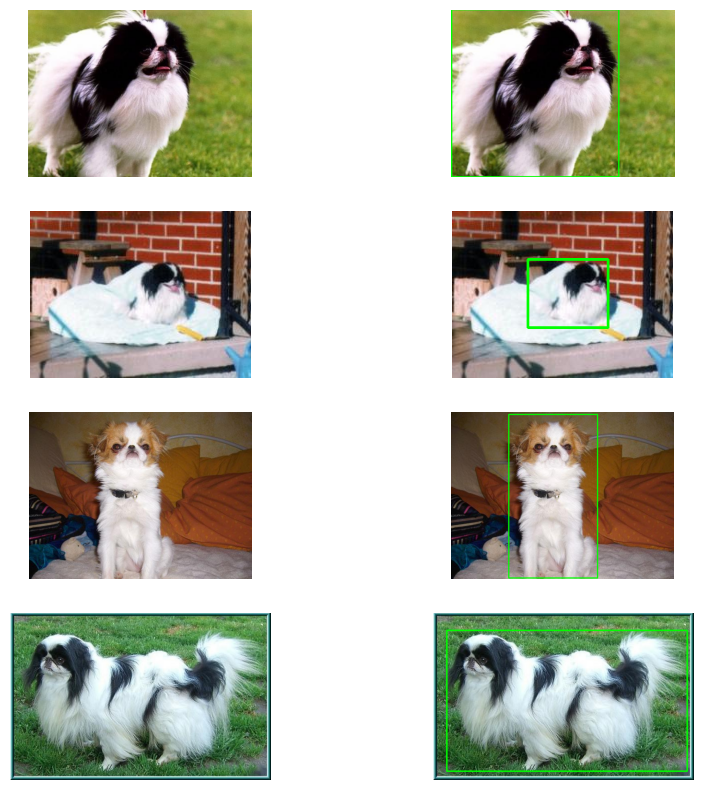

In [23]:
def show_dataset(sample_data_loader):
    plt.figure(figsize=(10, 10))
    plot_samples = 4
    plot_cols = 2
    _plot_idx = 0

    for images, metadatas in sample_data_loader:
        for img, metadata in zip(images, metadatas):
            if _plot_idx >= plot_samples * plot_cols:
                break

            _plot_idx += 1
            plt.subplot(plot_samples, plot_cols, _plot_idx)

            image_np = img.permute(1, 2, 0).numpy()  # C, H, W -> H, W, C
            plt.imshow((255 * image_np).astype(np.uint8))
            plt.axis('off')

            _plot_idx += 1
            plt.subplot(plot_samples, plot_cols, _plot_idx)

            image_with_bbox = image_np.copy()
            boxes = metadata["boxes"]
            if len(boxes.shape) == 3:
                boxes = boxes.squeeze(0)
            for bbox in boxes:
                xmin, ymin, xmax, ymax = map(int, bbox.tolist())
                cv2.rectangle(image_with_bbox, (xmin, ymin), (xmax, ymax), (0, 1, 0), 2)
            plt.imshow((255 * image_with_bbox).astype(np.uint8))
            plt.axis('off')

        if _plot_idx >= plot_samples * plot_cols:
            break


# Corrected collate_fn to handle target dictionaries
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets

transform = T.Compose([T.ToTensor()])

dataset = StanfordDogsDataset(root="/content/data/StanfordDogs_final", transforms=transform)

train_size = dataset.__len__() - 20

indices = list(range(len(dataset)))
dataset_train = Subset(dataset, indices[:train_size])
dataset_test = Subset(dataset, indices[train_size:])

print("total :", len(dataset))
print("train :", len(dataset_train))
print("test :",len(dataset_test))

show_dataset(torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                               shuffle=False, collate_fn=collate_fn))

### Run to chose Fatser-RCNN RESNET 50 model

In [ ]:
#- Load a model pre-trained on COCO OR from scratch

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True) # fine tuning
# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None, weights_backbone=None) : from scratch

# 1 class (dog) + background.
num_classes = 2

#- Get number of input features for the classifier.
in_features = model.roi_heads.box_predictor.cls_score.in_features

#- Replace the pre-trained head with a new one.
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Run to chose Fatser-RCNN RESNET 18 model

In [ ]:
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# Create the backbone ResNet-18 with FPN
backbone = resnet_fpn_backbone('resnet18', pretrained=False)

# Faster R-CNN with 1 class + background
model = FasterRCNN(backbone, num_classes=2)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
#- DataLoaders.
data_loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=BATCH_SIZE,
                                          shuffle=True, collate_fn=collate_fn)

data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=BATCH_SIZE,
                                               shuffle=False, collate_fn=collate_fn)

#- Move model to the right device.
model.to(DEVICE)

# Define the optimizer and a learning rate scheduler.
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3,
                                               gamma=0.1)

In [ ]:
# Training step.
print(f"Start training on {DEVICE} [...]")

def train_epoch(model, optimizer, data_loader, device, epoch):
    model.train()

    for i, (images, targets) in (tepoch := tqdm(enumerate(data_loader), unit="batch", total=len(data_loader))):
        tepoch.set_description(f"Epoch {epoch}")

        # Step 1: send the image to the required device.
        # Images is a list of B images (where B = batch_size of the DataLoader).
        images = list(img.to(device) for img in images)

        # Step 2: send each target to the required device
        # Targets is a dictionary of metadata. each (k,v) pair is a metadata
        # required for training.
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        model_time = time.time()
        loss_dict = model(images, targets)
        model_time = time.time() - model_time

        #- Step 3. backward on loss.
        # Normally, you would obtain the loss from the model.forward()
        # and then just call .bacward() on it.
        # In this case, for each task, you have a different loss, due to
        # different error metrics adopted by the tasks.
        # One typical approach is to combine all the losses to one single loss,
        # and then then backward that single loss.
        # In this way you can adjust the weight of the different tasks,
        # multiplying each loss for a hyperparemeter.
        # E.G.:
        #       final_loss = loss_1 + gamma*(alpha*loss_2 + beta*loss_3)
        # In this case, we want to sum up all the losses.
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        tepoch.set_postfix(loss=losses.item())


for epoch in range(EPOCH):
    train_epoch(model, optimizer, data_loader_train, DEVICE, epoch)
    lr_scheduler.step()

Start training on cuda [...]


  0%|          | 0/1840 [00:00<?, ?batch/s]

  0%|          | 0/1840 [00:00<?, ?batch/s]

### Evaluation of the model

In [ ]:
class CocoEvaluator:
    def __init__(self, coco_gt, iou_types):
        assert isinstance(iou_types, (list, tuple))
        coco_gt = copy.deepcopy(coco_gt)
        self.coco_gt = coco_gt

        self.iou_types = iou_types
        self.coco_eval = {}
        for iou_type in iou_types:
            self.coco_eval[iou_type] = COCOeval(coco_gt, iouType=iou_type)

        self.img_ids = []
        self.eval_imgs = {k: [] for k in iou_types}

    def update(self, predictions):
        img_ids = list(np.unique(list(predictions.keys())))
        self.img_ids.extend(img_ids)

        for iou_type in self.iou_types:
            results = self.prepare(predictions, iou_type)
            with contextlib.redirect_stdout(io.StringIO()):
                coco_dt = COCO.loadRes(self.coco_gt, results) if results else COCO()
            coco_eval = self.coco_eval[iou_type]

            coco_eval.cocoDt = coco_dt
            coco_eval.params.imgIds = list(img_ids)
            img_ids, eval_imgs = coco_evaluate(coco_eval)

            self.eval_imgs[iou_type].append(eval_imgs)

    def synchronize_between_processes(self):
        for iou_type in self.iou_types:
            self.eval_imgs[iou_type] = np.concatenate(self.eval_imgs[iou_type], 2)
            create_common_coco_eval(self.coco_eval[iou_type], self.img_ids, self.eval_imgs[iou_type])

    def accumulate(self):
        for coco_eval in self.coco_eval.values():
            coco_eval.accumulate()

    def summarize(self):
        for iou_type, coco_eval in self.coco_eval.items():
            print(f"IoU metric: {iou_type}")
            coco_eval.summarize()

    def prepare(self, predictions, iou_type):
        if iou_type == "bbox":
            return self.prepare_for_coco_detection(predictions)
        if iou_type == "segm":
            return self.prepare_for_coco_segmentation(predictions)
        if iou_type == "keypoints":
            return self.prepare_for_coco_keypoint(predictions)
        raise ValueError(f"Unknown iou type {iou_type}")

    def prepare_for_coco_detection(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "bbox": box,
                        "score": scores[k],
                    }
                    for k, box in enumerate(boxes)
                ]
            )
        return coco_results

def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def merge(img_ids, eval_imgs):
    import torch.distributed as dist

    def is_dist_avail_and_initialized():
        if not dist.is_available():
            return False
        if not dist.is_initialized():
            return False
        return True

    def get_world_size():
        if not is_dist_avail_and_initialized():
            return 1
        return dist.get_world_size()

    def all_gather(data):
        world_size = get_world_size()
        if world_size == 1:
            return [data]
        data_list = [None] * world_size
        dist.all_gather_object(data_list, data)
        return data_list

    all_img_ids = all_gather(img_ids)
    all_eval_imgs = all_gather(eval_imgs)

    merged_img_ids = []
    for p in all_img_ids:
        merged_img_ids.extend(p)

    merged_eval_imgs = []
    for p in all_eval_imgs:
        merged_eval_imgs.append(p)

    merged_img_ids = np.array(merged_img_ids)
    merged_eval_imgs = np.concatenate(merged_eval_imgs, 2)

    # Keep only unique (and in sorted order) images.
    merged_img_ids, idx = np.unique(merged_img_ids, return_index=True)
    merged_eval_imgs = merged_eval_imgs[..., idx]

    return merged_img_ids, merged_eval_imgs

def create_common_coco_eval(coco_eval, img_ids, eval_imgs):
    img_ids, eval_imgs = merge(img_ids, eval_imgs)
    img_ids = list(img_ids)
    eval_imgs = list(eval_imgs.flatten())

    coco_eval.evalImgs = eval_imgs
    coco_eval.params.imgIds = img_ids
    coco_eval._paramsEval = copy.deepcopy(coco_eval.params)

def coco_evaluate(imgs):
    with contextlib.redirect_stdout(io.StringIO()):
        imgs.evaluate()
    return imgs.params.imgIds, np.asarray(imgs.evalImgs).reshape(-1, len(imgs.params.areaRng), len(imgs.params.imgIds))

In [ ]:
def convert_to_coco_api(ds):
    coco_ds = COCO()
    # Annotation IDs need to start at 1, not 0, see torchvision issue #1530.
    ann_id = 1
    dataset = {"images": [], "categories": [], "annotations": [],
               # Add a placeholder 'info' dictionary
               "info": {"description": "Converted dataset", "version": "1.0", "year": 2023,
                        "date_created": "2023/01/01"}}
    categories = set()
    for img_idx in range(len(ds)):
        # Find better way to get target.
        # targets = ds.get_annotations(img_idx)
        img, targets = ds[img_idx]
        image_id = targets["image_id"].item()
        img_dict = {}
        img_dict["id"] = image_id
        img_dict["height"] = img.shape[-2]
        img_dict["width"] = img.shape[-1]
        dataset["images"].append(img_dict)
        bboxes = targets["boxes"]
        bboxes[:, 2:] -= bboxes[:, :2]
        bboxes = bboxes.tolist()
        labels = targets["labels"].tolist()
        areas = targets["area"].tolist()
        iscrowd = targets["iscrowd"].tolist()
        num_objs = len(bboxes)
        for i in range(num_objs):
            ann = {}
            ann["image_id"] = image_id
            ann["bbox"] = bboxes[i]
            ann["category_id"] = labels[i]
            categories.add(labels[i])
            ann["area"] = areas[i]
            ann["iscrowd"] = iscrowd[i]
            ann["id"] = ann_id
            dataset["annotations"].append(ann)
            ann_id += 1
    dataset["categories"] = [{"id": i} for i in sorted(categories)]
    coco_ds.dataset = dataset
    coco_ds.createIndex()
    return coco_ds

def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torchvision.datasets.CocoDetection):
            break
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco
    return convert_to_coco_api(dataset)

### Quantitative results

In [ ]:
def evaluate(model, data_loader, device):
    n_threads = torch.get_num_threads()
    torch.set_num_threads(1)
    cpu_device = torch.device("cpu")

    coco = get_coco_api_from_dataset(data_loader.dataset)
    coco_evaluator = CocoEvaluator(coco, ["bbox"])
    model.eval()

    for images, targets in data_loader:
        images = list(img.to(device) for img in images)

        if torch.cuda.is_available():
            torch.cuda.synchronize()
        model_time = time.time()

        with torch.no_grad():
            outputs = model(images)

        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
        model_time = time.time() - model_time

        res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
        evaluator_time = time.time()
        coco_evaluator.update(res)
        evaluator_time = time.time() - evaluator_time

    coco_evaluator.synchronize_between_processes()

    # Accumulate predictions from all images.
    coco_evaluator.accumulate()
    coco_evaluator.summarize()
    torch.set_num_threads(n_threads)

    return coco_evaluator

indices_test = list(range(len(dataset_test)))

terrier_test = torch.utils.data.DataLoader(Subset(dataset_test, indices_test[0:10]), batch_size=BATCH_SIZE,
                                               shuffle=False, collate_fn=collate_fn)

staff_test = torch.utils.data.DataLoader(Subset(dataset_test, indices_test[-10:20]), batch_size=BATCH_SIZE,
                                               shuffle=False, collate_fn=collate_fn)

evaluate(model, terrier_test, DEVICE)

creating index...
index created!
Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.857
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.312
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.443
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall

### Qualitative results

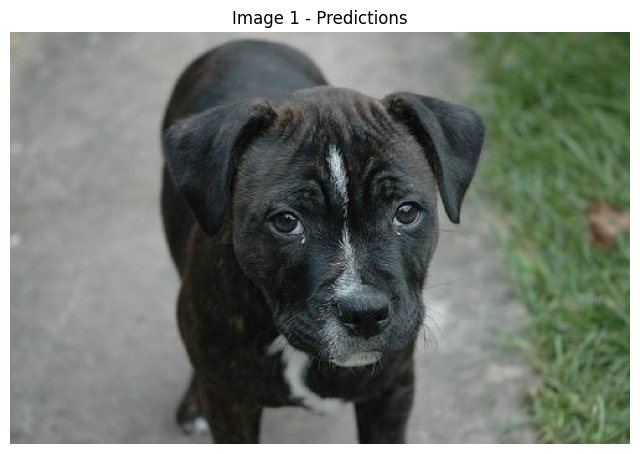

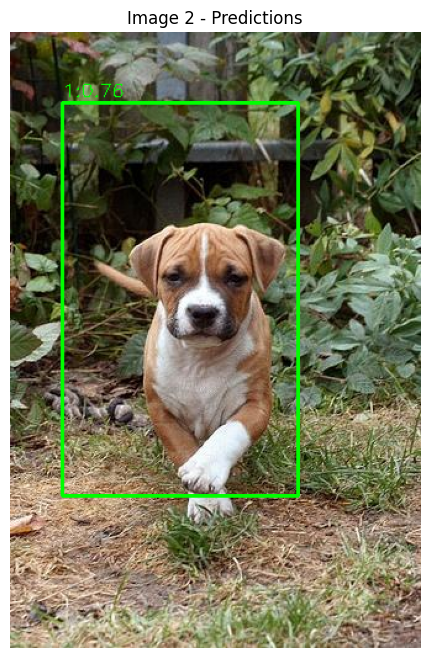

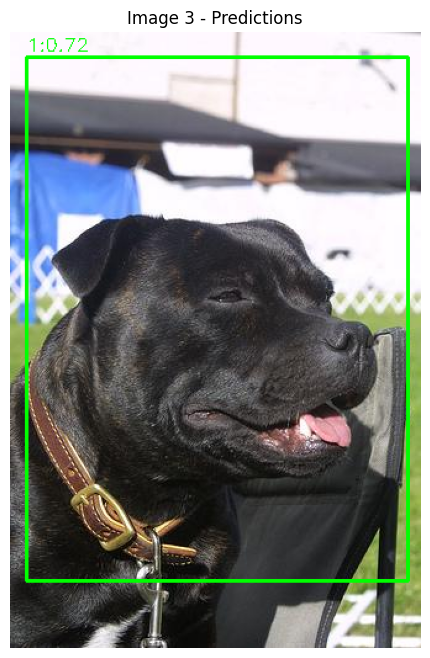

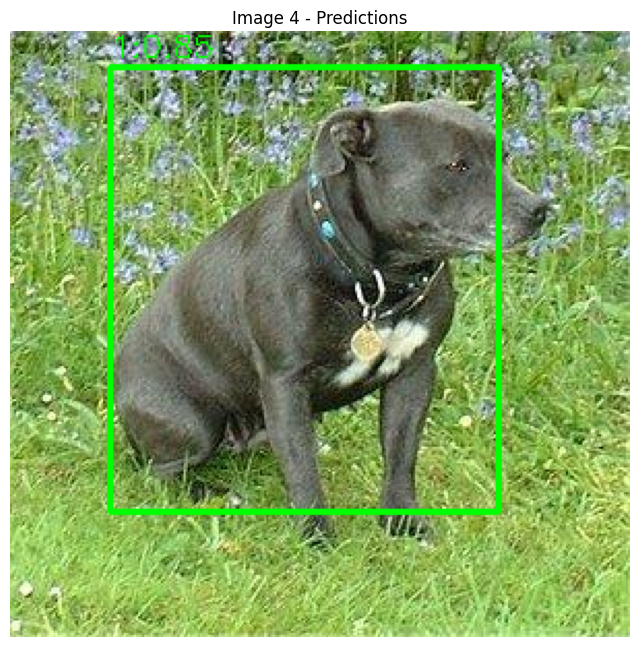

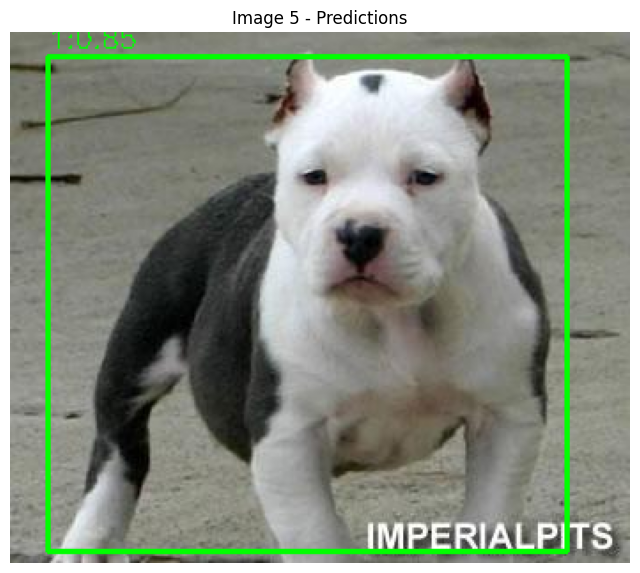

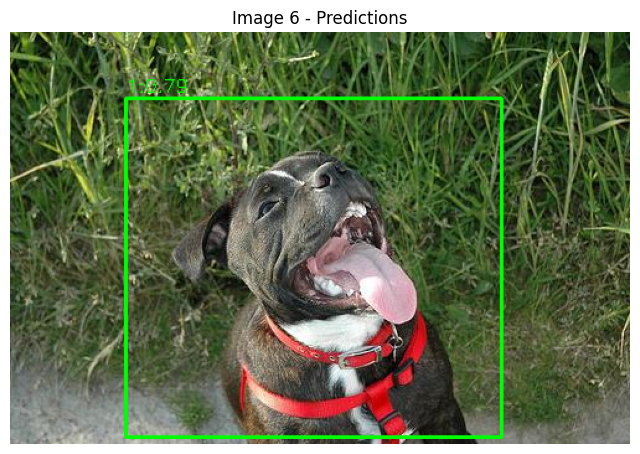

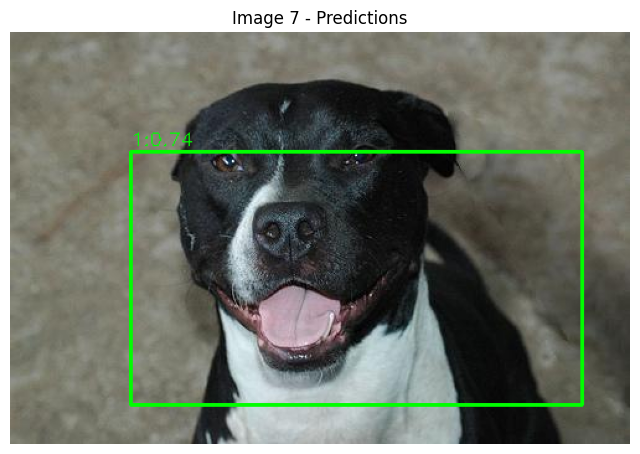

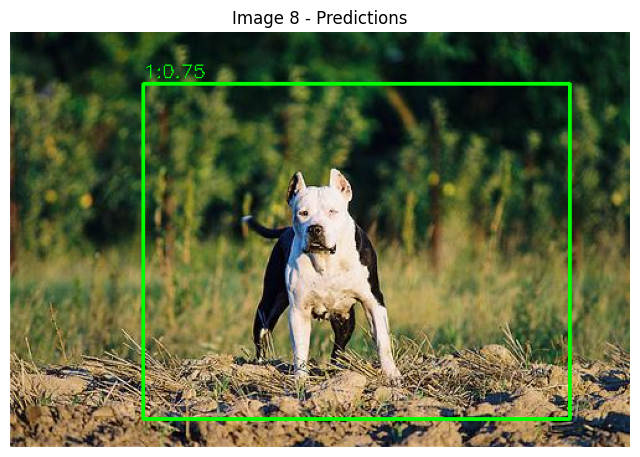

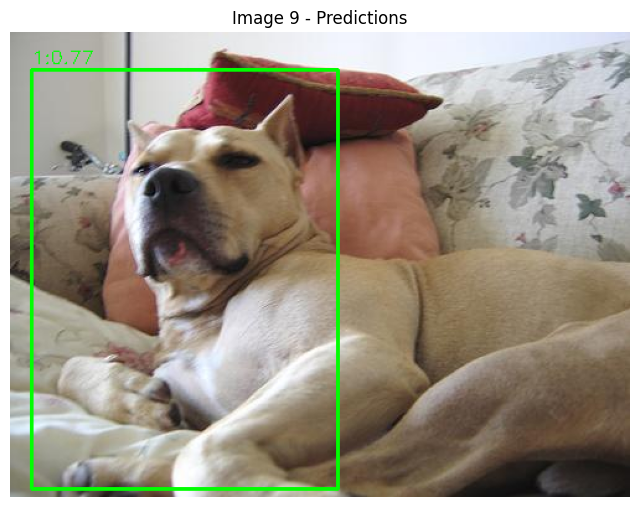

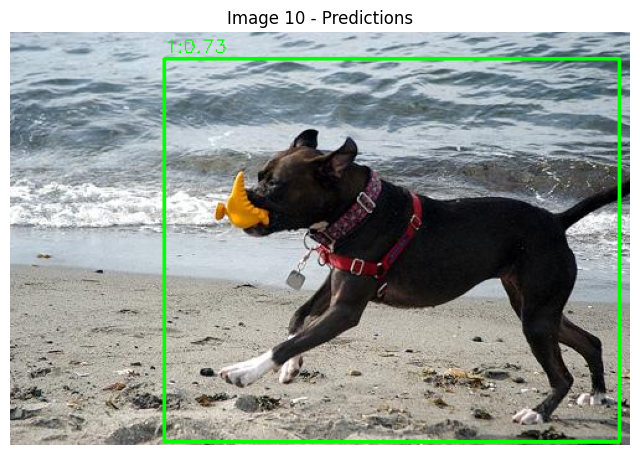

In [ ]:
def plot_predictions(model, data_loader, device, max_images=20, score_threshold=0.5):
    model.eval()
    cpu_device = torch.device("cpu")

    count = 0
    for images, targets in data_loader:
        images = list(img.to(device) for img in images)

        with torch.no_grad():
            outputs = model(images)

        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]

        for i in range(len(images)):
            if count >= max_images:
                return

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img * 255).astype('uint8') if img.max() <= 1 else img.astype('uint8')  # selon normalisation

            img_with_boxes = img.copy()

            boxes = outputs[i]['boxes']
            scores = outputs[i]['scores']
            labels = outputs[i]['labels']

            for box, score, label in zip(boxes, scores, labels):
                if score < score_threshold:
                    continue

                xmin, ymin, xmax, ymax = box.int().tolist()
                cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
                cv2.putText(img_with_boxes, f'{label.item()}:{score:.2f}', (xmin, ymin-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            plt.figure(figsize=(8, 8))
            plt.imshow(img_with_boxes)
            plt.axis('off')
            plt.title(f'Image {count+1} - Predictions')
            plt.show()

            count += 1

#data_loader_test
plot_predictions(model, staff_test, DEVICE, max_images=20, score_threshold=0.65)

### Comparison with first model (RESNET 50 pretrained) on the same image

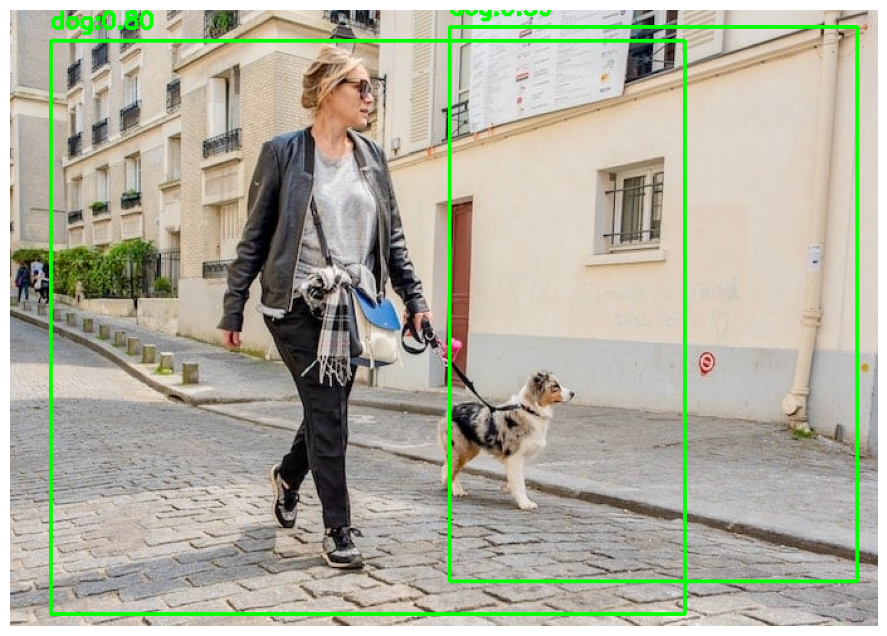

In [ ]:
# Transformation
transform = T.Compose([T.ToTensor()])

def show_image_with_boxes(image, boxes, labels, scores, threshold=0.5):
    image = np.array(image)
    for box, label, score in zip(boxes, labels, scores):
        if score < threshold:
            continue
        xmin, ymin, xmax, ymax = box.astype(int)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, f"{label}:{score:.2f}", (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

img_path = "/content/chien-en-ville.jpeg"
img = Image.open(img_path).convert("RGB")
img_t = transform(img).to(DEVICE)

# Prediction
with torch.no_grad():
    pred = model([img_t])[0]

boxes = pred['boxes'].cpu().numpy()
labels = pred['labels'].cpu().numpy()
scores = pred['scores'].cpu().numpy()

# For the 1 class model
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'dog'
]

labels_names = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in labels]

show_image_with_boxes(img, boxes, labels_names, scores)